In [8]:
import pandas as pd
import numpy as np
from mlp import MultiLayerNeuralNetwork


In [9]:
import seaborn as sns

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

df = sns.load_dataset('iris')
df.replace({'setosa':0,'versicolor':1,'virginica':2},inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
trns = scaler.fit_transform(df.iloc[:, 0:4])
X=trns
Y=pd.get_dummies(df.iloc[:,4]).values

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


                                       ( MODEL SUMMARY )                                
        
               Layer        Activation Function     Output Shape           Params       

               Input               linear            (None, 4)               0          
        ----------------------------------------------------------------------------------

               Dense                tanh             (None, 10)              50         
        ----------------------------------------------------------------------------------

               Dense                tanh             (None, 10)             110         
        ----------------------------------------------------------------------------------

               Output             softmax            (None, 3)               33         
        ----------------------------------------------------------------------------------


        Total Params (trainable) - 193
        _______________________________________

0.9333333333333333

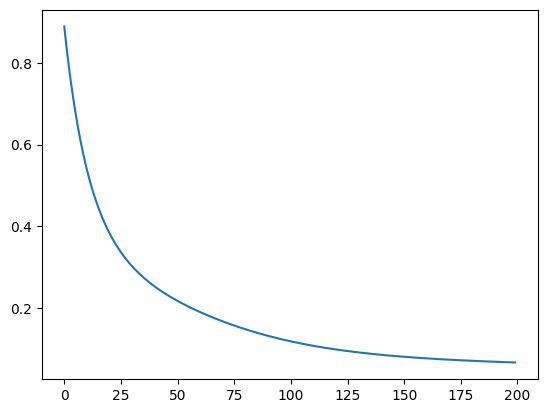

In [13]:
model = MultiLayerNeuralNetwork()
model.add_layer(4,input_layer=True)
model.add_layer(10,activation_function='tanh')
model.add_layer(10,activation_function='tanh')
model.add_layer(3,activation_function='softmax',output_layer=True)
model.add_optimizer('RMSprop')
model.compile_model(loss_function='categorical_cross_entropy',weight_initializer='glorot_uniform',seed=3)
model.fit(X_train, Y_train,learning_rate=0.0001,epochs=200,show_loss=False,early_stopping=False)
Y_pred = model.predict(X_test)
plt.plot(model.history['Losses'])
Y_p = np.argmax(Y_pred,axis=1)
Y_t= np.argmax(Y_test,axis=1)
accuracy_score(Y_t, Y_p)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 51ms/step


0.9333333333333333

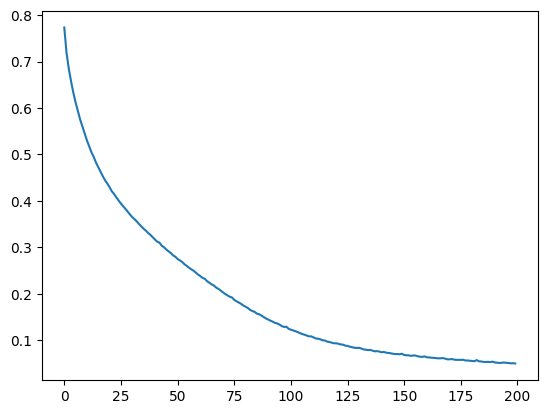

In [14]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
model = Sequential()
initializer = keras.initializers.GlorotUniform(seed=3)
model.add(Dense(10, activation='tanh', input_dim=4,kernel_initializer=initializer))
model.add(Dense(10, activation='tanh',kernel_initializer=initializer))
model.add(Dense(3, activation='softmax',kernel_initializer=initializer))
model.compile(loss='CategoricalCrossentropy', metrics=['mse'])
model.summary()
history = model.fit(X_train, Y_train, epochs=200,verbose=0)
Y_pred = model.predict(X_test)
plt.plot(history.history['loss'])
Y_p = np.argmax(Y_pred,axis=1)
Y_t= np.argmax(Y_test,axis=1)
accuracy_score(Y_t, Y_p)